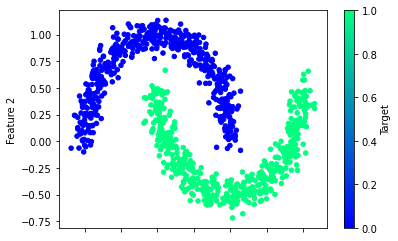

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [2]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [4]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 620us/step - loss: 0.7086 - accuracy: 0.5219
Epoch 2/100
24/24 [==============================] - 0s 657us/step - loss: 0.6745 - accuracy: 0.6099
Epoch 3/100
24/24 [==============================] - 0s 670us/step - loss: 0.6427 - accuracy: 0.7750
Epoch 4/100
24/24 [==============================] - 0s 641us/step - loss: 0.6176 - accuracy: 0.8533
Epoch 5/100
24/24 [==============================] - 0s 659us/step - loss: 0.5945 - accuracy: 0.8722
Epoch 6/100
24/24 [==============================] - 0s 681us/step - loss: 0.5668 - accuracy: 0.8845
Epoch 7/100
24/24 [==============================] - 0s 659us/step - loss: 0.5415 - accuracy: 0.8907
Epoch 8/100
24/24 [==============================] - 0s 700us/step - loss: 0.5171 - accuracy: 0.9002
Epoch 9/100
24/24 [==============================] - 0s 633us/step - loss: 0.4920 - accuracy: 0.8958
Epoch 10/100
24/24 [==============================] - 0s 649us/step - loss: 0.4704 - accura

24/24 [==============================] - 0s 615us/step - loss: 0.2371 - accuracy: 0.8965
Epoch 82/100
24/24 [==============================] - 0s 608us/step - loss: 0.1885 - accuracy: 0.9258
Epoch 83/100
24/24 [==============================] - 0s 627us/step - loss: 0.2201 - accuracy: 0.9109
Epoch 84/100
24/24 [==============================] - 0s 620us/step - loss: 0.2087 - accuracy: 0.9173
Epoch 85/100
24/24 [==============================] - 0s 598us/step - loss: 0.2441 - accuracy: 0.9003
Epoch 86/100
24/24 [==============================] - 0s 598us/step - loss: 0.2311 - accuracy: 0.9141
Epoch 87/100
24/24 [==============================] - 0s 618us/step - loss: 0.2178 - accuracy: 0.9060
Epoch 88/100
24/24 [==============================] - 0s 609us/step - loss: 0.2345 - accuracy: 0.9112
Epoch 89/100
24/24 [==============================] - 0s 593us/step - loss: 0.2304 - accuracy: 0.9071
Epoch 90/100
24/24 [==============================] - 0s 602us/step - loss: 0.1941 - accuracy: 

In [5]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2479 - accuracy: 0.8760
Loss: 0.24793344736099243, Accuracy: 0.8759999871253967


In [6]:
# Create a new neural network model with 6 neurons
nn_model2 = tf.keras.models.Sequential()

nn_model2.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=2))

nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
24/24 [==============================] - 0s 683us/step - loss: 0.7112 - accuracy: 0.5639
Epoch 2/100
24/24 [==============================] - 0s 629us/step - loss: 0.6651 - accuracy: 0.6642
Epoch 3/100
24/24 [==============================] - 0s 649us/step - loss: 0.6340 - accuracy: 0.6991
Epoch 4/100
24/24 [==============================] - 0s 645us/step - loss: 0.5903 - accuracy: 0.7513
Epoch 5/100
24/24 [==============================] - 0s 643us/step - loss: 0.5496 - accuracy: 0.7945
Epoch 6/100
24/24 [==============================] - 0s 640us/step - loss: 0.5184 - accuracy: 0.8239
Epoch 7/100
24/24 [==============================] - 0s 659us/step - loss: 0.4914 - accuracy: 0.8299
Epoch 8/100
24/24 [==============================] - 0s 655us/step - loss: 0.4690 - accuracy: 0.8393
Epoch 9/100
24/24 [==============================] - 0s 650us/step - loss: 0.4455 - accuracy: 0.8595
Epoch 10/100
24/24 [==============================] - 0s 646us/step - loss: 0.4261 - accura

24/24 [==============================] - 0s 616us/step - loss: 0.2425 - accuracy: 0.8925
Epoch 82/100
24/24 [==============================] - 0s 619us/step - loss: 0.2194 - accuracy: 0.9068
Epoch 83/100
24/24 [==============================] - 0s 655us/step - loss: 0.2007 - accuracy: 0.9135
Epoch 84/100
24/24 [==============================] - 0s 655us/step - loss: 0.2132 - accuracy: 0.9113
Epoch 85/100
24/24 [==============================] - 0s 662us/step - loss: 0.2362 - accuracy: 0.9004
Epoch 86/100
24/24 [==============================] - 0s 643us/step - loss: 0.2022 - accuracy: 0.9148
Epoch 87/100
24/24 [==============================] - 0s 625us/step - loss: 0.2189 - accuracy: 0.9084
Epoch 88/100
24/24 [==============================] - 0s 627us/step - loss: 0.1913 - accuracy: 0.9292
Epoch 89/100
24/24 [==============================] - 0s 626us/step - loss: 0.2179 - accuracy: 0.9152
Epoch 90/100
24/24 [==============================] - 0s 631us/step - loss: 0.1956 - accuracy: 

In [7]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2214 - accuracy: 0.8920
Loss: 0.22138477861881256, Accuracy: 0.8920000195503235
